<a href="https://colab.research.google.com/github/gautumsvp7/SolarDataSetPublic/blob/main/Solar_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving solar-energy-production-sites-1.csv to solar-energy-production-sites-1 (1).csv


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  


from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['solar-energy-production-sites-1.csv'])) 
print(df)

                          Facility Name  ...                                 Address / Location
0    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
1    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
2    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
3    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
4    Veterans Memorial Community Center  ...       101 S Pavilion Center\nLas Vegas, NV 89144\n
..                                  ...  ...                                                ...
377                    Ed Fountain Park  ...  1400 N Decatur Blvd\nLas Vegas, NV 89108\n(36....
378    Durango Hills Community Center S  ...  3521 N Durango Dr\nLas Vegas, NV 89129\n(36.22...
379                     Fire Station 44  ...  7701 W Washington Ave\nLas Vegas, NV 89128\n(3...
380               Centennial Hills Park 

In [4]:
df.describe()

,KW Rating,KWH Generated,Generated
count,382.000000,3.820000e+02,382.000000
mean,195.302618,3.724244e+05,32259.801047
std,658.166173,1.338346e+06,119224.015824
min,15.300000,2.745200e+04,1136.000000
25%,30.100000,4.942500e+04,4245.750000
50%,44.500000,7.208900e+04,6697.000000
75%,100.000000,1.468800e+05,11163.000000
max,3334.000000,6.759539e+06,805458.000000


In [5]:
print(df.groupby('Facility Name').size())

Facility Name
All American Park                           9
Centennial Hills Community Center N & S     9
Centennial Hills Park                      11
Durango Hills Community Center S           10
East Las Vegas Community Center            13
East Yard - Fire Equipment Center           9
East Yard - Main Gate 1                    17
East Yard - Sign Shop                      17
Ed Fountain Park                            9
Fire Station 10                            13
Fire Station 106                            8
Fire Station 107                            9
Fire Station 41                            13
Fire Station 43                            14
Fire Station 44                            13
Fire Station 45                            13
Fire Station 48                            13
Fire Station 5                             13
Fire Station 6                             13
Fire Station 7                             13
Fire Station 8                             13
Lorenzi Park        

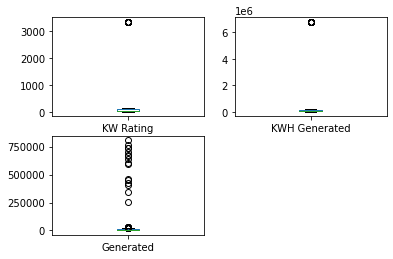

In [6]:
#Data Visualiztion
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey =False)
plt.show()

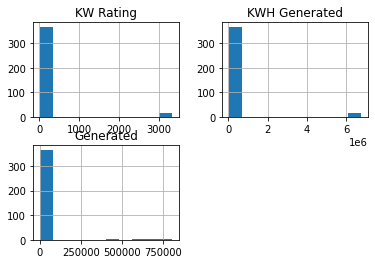

In [7]:
df.hist()
plt.show()

In [8]:
copy_df = df
f_names =set(copy_df['Facility Name'])


In [9]:
for col in copy_df.columns:
  print(col)

Facility Name
KW Rating
KWH Generated
Date
Generated
Address / Location


In [10]:
trimmed_df=copy_df.drop(['Date','Address / Location'],axis=1)

In [11]:
trimmed_df

,Facility Name,KW Rating,KWH Generated,Generated
0,Veterans Memorial Community Center,116.2,218498,22603
1,Veterans Memorial Community Center,116.2,218498,23330
2,Veterans Memorial Community Center,116.2,218498,17678
3,Veterans Memorial Community Center,116.2,218498,14427
4,Veterans Memorial Community Center,116.2,218498,10828
...,...,...,...,...
377,Ed Fountain Park,144.5,151050,20100
378,Durango Hills Community Center S,33.6,45246,2832
379,Fire Station 44,30.0,57914,6012
380,Centennial Hills Park,30.1,38876,4998


In [12]:
#creating dictionary to replace the names for easier analysis
list_loc = list(f_names)
d_loc = {}
ni = 0
for i in list_loc:
  d_loc[i] = ni
  ni += 1
print(d_loc)
#print(f_names)

{'Veterans Memorial Community Center': 0, 'East Yard - Main Gate 1': 1, 'Fire Station 10': 2, 'Rainbow Park': 3, 'Ed Fountain Park': 4, 'Mirabelli Community Center': 5, 'West Yard - Vehicle Services': 6, 'East Yard - Fire Equipment Center': 7, 'East Yard - Sign Shop': 8, 'Stupak Community Center': 9, 'Fire Station 48': 10, 'Fire Station 7': 11, 'All American Park': 12, 'Lorenzi Park': 13, 'West Yard - EOC': 14, 'Centennial Hills Community Center N & S': 15, 'East Las Vegas Community Center': 16, 'Fire Station 106': 17, 'WPCF Plant': 18, 'Fire Station 43': 19, 'Fire Station 45': 20, 'Fire Station 107': 21, 'Fire Station 41': 22, 'Fire Station 6': 23, 'Fire Station 8': 24, 'Durango Hills Community Center S': 25, 'Centennial Hills Park': 26, 'Fire Station 5': 27, 'West Yard - Operations-Maintenance': 28, 'Natural History Museum': 29, 'Fire Station 44': 30}


In [13]:
len(d_loc.keys())

31

In [14]:
test_df = trimmed_df

In [15]:
nest_d = {'Facility Name':d_loc}
print(nest_d)

{'Facility Name': {'Veterans Memorial Community Center': 0, 'East Yard - Main Gate 1': 1, 'Fire Station 10': 2, 'Rainbow Park': 3, 'Ed Fountain Park': 4, 'Mirabelli Community Center': 5, 'West Yard - Vehicle Services': 6, 'East Yard - Fire Equipment Center': 7, 'East Yard - Sign Shop': 8, 'Stupak Community Center': 9, 'Fire Station 48': 10, 'Fire Station 7': 11, 'All American Park': 12, 'Lorenzi Park': 13, 'West Yard - EOC': 14, 'Centennial Hills Community Center N & S': 15, 'East Las Vegas Community Center': 16, 'Fire Station 106': 17, 'WPCF Plant': 18, 'Fire Station 43': 19, 'Fire Station 45': 20, 'Fire Station 107': 21, 'Fire Station 41': 22, 'Fire Station 6': 23, 'Fire Station 8': 24, 'Durango Hills Community Center S': 25, 'Centennial Hills Park': 26, 'Fire Station 5': 27, 'West Yard - Operations-Maintenance': 28, 'Natural History Museum': 29, 'Fire Station 44': 30}}


In [16]:
final_df = test_df.replace(to_replace = nest_d, value= None)

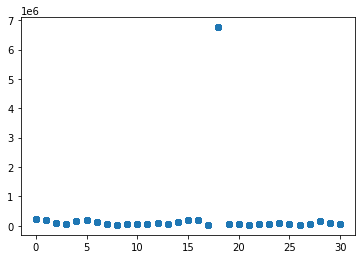

In [17]:
x1 = final_df['Facility Name']
x2 = final_df['KWH Generated']
plt.scatter(x1,x2)
plt.show()

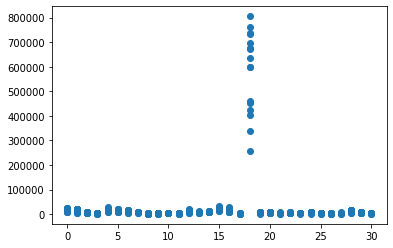

In [18]:
x1 = final_df['Facility Name']
x2 = final_df['Generated']
plt.scatter(x1,x2)
plt.show()


final_df should be used from this point onwards.
Facitlity name is the dependent variable.

# Training a model

In [19]:

array = final_df.values
print(array)


[[0.00000e+00 1.16200e+02 2.18498e+05 2.26030e+04]
 [0.00000e+00 1.16200e+02 2.18498e+05 2.33300e+04]
 [0.00000e+00 1.16200e+02 2.18498e+05 1.76780e+04]
 ...
 [3.00000e+01 3.00000e+01 5.79140e+04 6.01200e+03]
 [2.60000e+01 3.01000e+01 3.88760e+04 4.99800e+03]
 [2.80000e+01 7.93000e+01 1.46880e+05 1.09600e+04]]


In [20]:
final_df.shape

(382, 4)

To find the optimal numbers of clusters for applying K means, we are applying 'Elbow method'

In [21]:
X = final_df


In [22]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



In [23]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 537112.7601283487
2 : 52534.974475746196
3 : 25268.339106360083
4 : 21728.46716046131
5 : 16799.946254911756
6 : 12279.727529685666
7 : 11663.29029253217
8 : 11119.40215989691
9 : 9327.978115062548


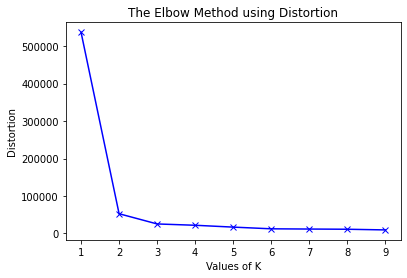

In [24]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


The value of K should be 2, as evident from the above graph

In [25]:
kmean = KMeans(n_clusters = 2,n_init=10,max_iter=300)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmean.inertia_

1607276942472.4385

In [27]:
kmean.cluster_centers_

array([[1.47486339e+01, 5.80918033e+01, 9.32062951e+04, 8.37138525e+03],
       [1.80000000e+01, 3.33400000e+03, 6.75953900e+06, 5.78707312e+05]])

In [28]:
kmean.n_iter_

2

In [29]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

Cluster 1 Inertia 687852072984489.9
Cluster 2 Inertia 1607276942472.4385
Cluster 3 Inertia 627783396337.0122
Cluster 4 Inertia 284523705446.0082
Cluster 5 Inertia 185582727280.13818
Cluster 6 Inertia 126188271253.20326
Cluster 7 Inertia 95348341879.90352
Cluster 8 Inertia 71080577427.6335
Cluster 9 Inertia 55662633603.48311
Cluster 10 Inertia 46772885400.30886
Cluster 11 Inertia 38202472594.56348
Cluster 12 Inertia 29061537058.364597
Cluster 13 Inertia 22288362900.172997
Cluster 14 Inertia 18938651650.172997
Cluster 15 Inertia 16639670318.52809
Cluster 16 Inertia 14222015955.28868
Cluster 17 Inertia 11779618783.622013
Cluster 18 Inertia 10499786089.749763
Cluster 19 Inertia 8932703368.738338


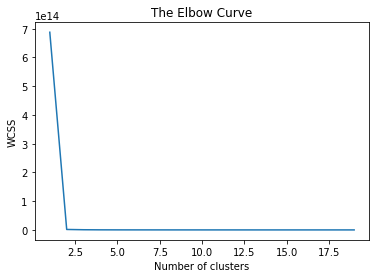

In [30]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") ##WCSS stands for total within-cluster sum of square
plt.show()

## TRYING FROM :
https://realpython.com/k-means-clustering-python/

Elbow method:

In [31]:
kmeans_kwargs = {"init":"random","n_init":10,"max_iter":300,"random_state":42}
sse = []
for k in range(1,11):
  kmeans= KMeans(n_clusters = k,**kmeans_kwargs)
  kmeans.fit(final_df)
  sse.append(kmeans.inertia_)

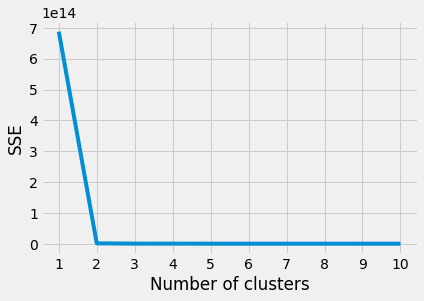

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()


Silhouette coefficient

In [33]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_coefficients = []
for k in range(2,10):
  kmean = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(final_df)
  score = silhouette_score(final_df,kmeans.labels_)
  silhouette_coefficients.append(score)


In [42]:
len(silhouette_coefficients)

8

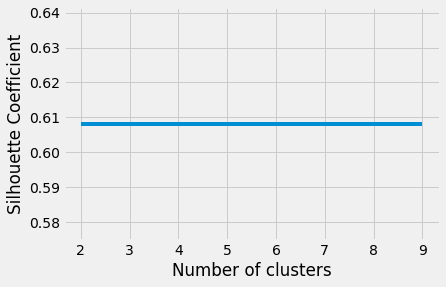

In [43]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()